In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as f

In [311]:
torch.set_default_dtype(torch.float64)

In [312]:
df = pd.read_csv("dataset/electricity.csv", encoding="utf-8")
df.head(5)

,date,0,1,2,3,4,5,6,7,8,...,311,312,313,314,315,316,317,318,319,OT
0,2016-07-01 02:00:00,14.0,69.0,234.0,415.0,215.0,1056.0,29.0,840.0,226.0,...,676.0,372.0,80100.0,4719.0,5002.0,48.0,38.0,1558.0,182.0,2162.0
1,2016-07-01 03:00:00,18.0,92.0,312.0,556.0,292.0,1363.0,29.0,1102.0,271.0,...,805.0,452.0,95200.0,4643.0,6617.0,65.0,47.0,2177.0,253.0,2835.0
2,2016-07-01 04:00:00,21.0,96.0,312.0,560.0,272.0,1240.0,29.0,1025.0,270.0,...,817.0,430.0,96600.0,4285.0,6571.0,64.0,43.0,2193.0,218.0,2764.0
3,2016-07-01 05:00:00,20.0,92.0,312.0,443.0,213.0,845.0,24.0,833.0,179.0,...,801.0,291.0,94500.0,4222.0,6365.0,65.0,39.0,1315.0,195.0,2735.0
4,2016-07-01 06:00:00,22.0,91.0,312.0,346.0,190.0,647.0,16.0,733.0,186.0,...,807.0,279.0,91300.0,4116.0,6298.0,75.0,40.0,1378.0,191.0,2721.0


In [313]:
df.index = pd.to_datetime(df.pop("date"))
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,OT
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01 02:00:00,14.0,69.0,234.0,415.0,215.0,1056.0,29.0,840.0,226.0,265.0,...,676.0,372.0,80100.0,4719.0,5002.0,48.0,38.0,1558.0,182.0,2162.0
2016-07-01 03:00:00,18.0,92.0,312.0,556.0,292.0,1363.0,29.0,1102.0,271.0,340.0,...,805.0,452.0,95200.0,4643.0,6617.0,65.0,47.0,2177.0,253.0,2835.0
2016-07-01 04:00:00,21.0,96.0,312.0,560.0,272.0,1240.0,29.0,1025.0,270.0,300.0,...,817.0,430.0,96600.0,4285.0,6571.0,64.0,43.0,2193.0,218.0,2764.0
2016-07-01 05:00:00,20.0,92.0,312.0,443.0,213.0,845.0,24.0,833.0,179.0,211.0,...,801.0,291.0,94500.0,4222.0,6365.0,65.0,39.0,1315.0,195.0,2735.0
2016-07-01 06:00:00,22.0,91.0,312.0,346.0,190.0,647.0,16.0,733.0,186.0,179.0,...,807.0,279.0,91300.0,4116.0,6298.0,75.0,40.0,1378.0,191.0,2721.0


In [314]:
x = torch.tensor(df["OT"])
x

tensor([2162., 2835., 2764.,  ..., 2650., 2719., 2640.])

In [315]:
t = torch.tensor(df.index.astype("int64") / 10**9 / 3600)
t

tensor([407594., 407595., 407596.,  ..., 433895., 433896., 433897.])

In [316]:
K = len(x)
tK = t[-1] - t[0]
tK

tensor(26303.)

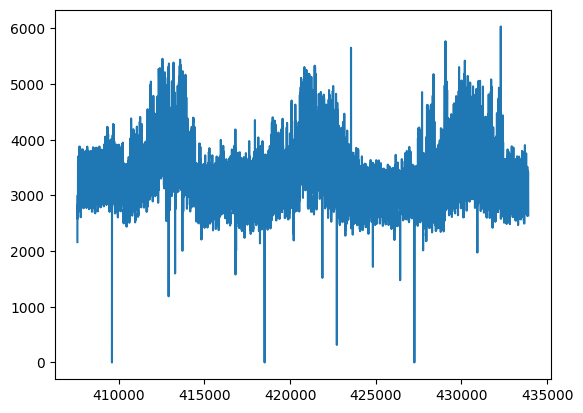

In [317]:
plt.plot(t, x)

In [318]:
T = t[1] - t[0]
T

tensor(1.)

In [319]:
L = 16
tL = L * T
tL

tensor(16.)

In [320]:
F = 16
tF = F * T
tF

tensor(16.)

In [321]:
amps = torch.abs(torch.fft.fft(x)[: K // 2]) / K * 2
amps[0] = 0
amps.shape

torch.Size([13152])

In [322]:
freqs = 1 / T * torch.arange(K)[: K // 2] / K
freqs.shape

torch.Size([13152])

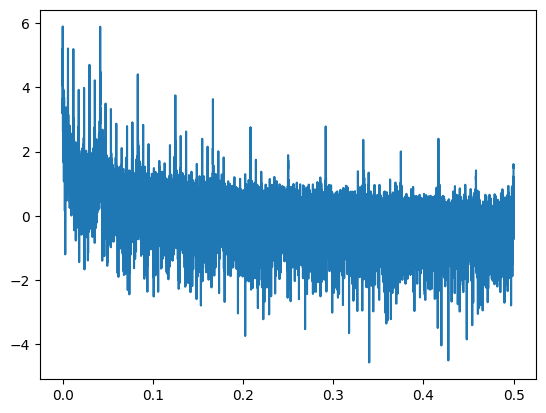

In [323]:
plt.plot(freqs, torch.log(amps))

In [324]:
topk = torch.topk(amps, k=1)
topk

torch.return_types.topk(
values=tensor([365.3312]),
indices=tensor([3]))

In [325]:
phi = freqs[topk.indices][0]
phi

tensor(0.0001)

In [326]:
tau = 1 / phi
tau

tensor(8768.)

In [327]:
n_tau = tau // T
n_tau = int(n_tau.item())
n_tau

8768

In [328]:
m = 1
tP = tL + m * tau
tP

tensor(8784.)

In [329]:
tK,tF,tP

(tensor(26303.), tensor(16.), tensor(8784.))

In [330]:
delta_ta = tK - tF - tP
delta_ta

tensor(17503.)

In [331]:
N = delta_ta // tP
N = int(N.item())
N

1

In [332]:
use_cuda = True
device = torch.device("cuda:0" if use_cuda and torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [333]:
l = nn.Linear(in_features=(m + 1) * L, out_features=F)
l = l.to(device=device)
l

Linear(in_features=32, out_features=16, bias=True)

  0%|          | 0/200 [00:00<?, ?it/s]

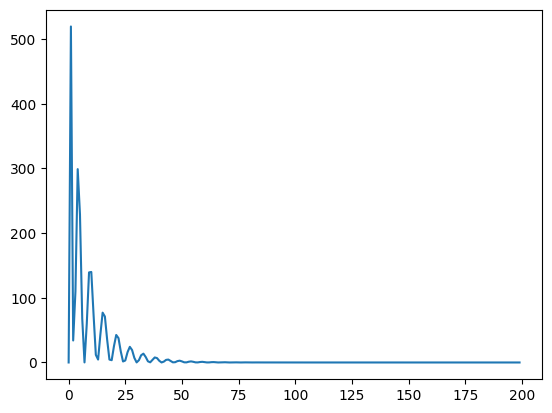

In [338]:
from tqdm.notebook import tqdm

n = 1
B = N // n

# plt.figure(figsize=(16, 4 * N))


optim = torch.optim.Adam(l.parameters(), lr=0.001)
criterion = nn.MSELoss()

total_loss = []

Y = None
Y_pred = None

for epoch in tqdm(range(200)):
    loss = None
    for i in range(B):
        X = []
        Y = []
        # 组装每批的数据
        for j in range(n):
            a = i * n + j
            b = a + L + m * n_tau
            c = b + F
            # plt.subplot(N, 1, a + 1)
            all_segments = []
            # segments
            for k in range(m + 1):
                starts = a + k * n_tau
                # plt.axvline(x=starts, color="blue")
                ends = a + L + k * n_tau
                # plt.axvline(x=ends, color="blue")
                all_segments.append(x[starts:ends])
            x_line = torch.cat(all_segments)
            X.append(x_line)
            # plt.title(f"{a=}")
            y_line = x[b:c]
            Y.append(y_line)
        # 每批的数据
        X = torch.stack(X).to(device=device)
        Y = torch.stack(Y).to(device=device)
        Y_pred = l(X)
        loss: torch.Tensor = criterion(Y_pred, Y)
        # print(f"{loss=}")
        optim.zero_grad()
        loss.backward()
        optim.step()

    total_loss.append(loss.item())

plt.plot(total_loss)

In [339]:
total_loss[-1]

5.775364531004543e-07